<a href="https://colab.research.google.com/github/AbyssGazer-Oliver/Machine-Learning/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 2.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
# TODO 1
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls",index_col=0)
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [3]:
# TODO 2
df1 = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [4]:
# TODO 3
y = np.unique(df1['Genotype'].values, return_inverse=True)[1]
print(y)

[0 0 0 ... 1 1 1]


In [5]:
# TODO 4
df2=df1.iloc[:,:-4]
xnames = np.array(df2.columns.values)
X = np.array(df2)

In [6]:
from sklearn.model_selection import train_test_split

#Use : shuffle=True, random_state=3 so we all can have same split.
# TODO 5: 
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=3)

In [7]:
from sklearn.preprocessing import StandardScaler

# TODO 6
scal = StandardScaler()
Xtr1 = scal.fit_transform(Xtr)
Xts1 = scal.transform(Xts)

In [8]:
# TODO 7
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(Xtr1, ytr)

LogisticRegression(C=100000.0, solver='liblinear')

In [9]:
# TODO 8
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts)
print("Accuracy on test data = %f" % acc)

Accuracy on test data = 0.947531


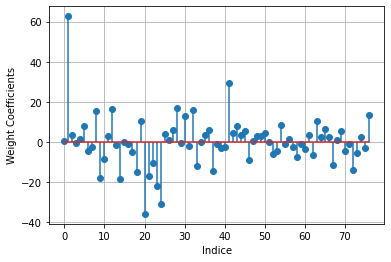

In [10]:
# TODO 9
W=logreg.coef_
W=W.ravel()
plt.stem(W,use_line_collection=True)
plt.xlabel('Indice')
plt.ylabel('Weight Coefficients')
plt.grid()

In [11]:
# TODO 10
W_sorted=np.argsort(W)
i=W_sorted[-1]
j=W_sorted[-2]
name1=xnames[i]
name2=xnames[j]
print("the names of the genes for two components i, j are", name1, "and", name2)

the names of the genes for two components i, j are ITSN1_N and TIAM1_N


In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)

# TODO 11
error=np.zeros(nfold)
prec=np.zeros(nfold)
rec=np.zeros(nfold)
f1=np.zeros(nfold)
for i, I in enumerate(kf.split(X)):
    
    # Get training and test data
    train, test = I
    Xtr = X[train,:]
    ytr = y[train]
    Xts = X[test,:]
    yts = y[test]
    
    # Scale the data
    scal = StandardScaler()
    Xtr1 = scal.fit_transform(Xtr)
    Xts1 = scal.transform(Xts)    
    
    # Fit a model    
    logreg.fit(Xtr1, ytr)
    
    # Predict on test samples and measure accuracy
    yhat = logreg.predict(Xts1)
    error[i] = np.mean(yhat != yts)
    
    # Measure other performance metrics
    prec[i],rec[i],f1[i],_  = precision_recall_fscore_support(yts,yhat,average='binary')

# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
errorm= np.mean(error)

# Compute the standard errors
prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)
error_se = np.std(error)/np.sqrt(nfold-1)

print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se))
print('Recall =    {0:.4f}, SE={1:.4f}'.format(recm, rec_se))
print('f1 =        {0:.4f}, SE={1:.4f}'.format(f1m, f1_se))
print('ErrorRate =  {0:.4f}, SE={1:.4f}'.format(errorm, error_se))

Precision = 0.9411, SE=0.0089
Recall =    0.9543, SE=0.0088
f1 =        0.9472, SE=0.0055
ErrorRate =  0.0491, SE=0.0044


In [13]:
# TODO 12
y = np.unique(df1['class'].values, return_inverse=True)[1]
print(y)

[0 0 0 ... 7 7 7]


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

# TODO 13
logreg=linear_model.LogisticRegression(C=1,solver='liblinear',multi_class='ovr')
C=np.zeros((np.max(y)+1,np.max(y)+1))
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
acc = np.zeros(nfold)
for i, I in enumerate(kf.split(X)):
    
    # Get training and test data
    train, test = I
    Xtr = X[train,:]
    ytr = y[train]
    Xts = X[test,:]
    yts = y[test]
    
    # Scale the data
    scal = StandardScaler()
    Xtr1 = scal.fit_transform(Xtr)
    Xts1 = scal.transform(Xts)    
    
    # Fit a model    
    logreg.fit(Xtr1, ytr)
    
    # Predict on test samples and measure accuracy
    yhat = logreg.predict(Xts1)
    acc[i] = np.mean(yhat == yts)
    C+=confusion_matrix(yts,yhat)
    
C_normalize=np.sum(C,axis =1)
C=C/C_normalize[np.newaxis,:]
accm= np.mean(acc)
acc_se = np.std(acc)/np.sqrt(nfold-1)
print(np.array_str(C, precision=4, suppress_small=True))
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

[[0.9667 0.0074 0.0067 0.     0.0222 0.     0.     0.    ]
 [0.0133 0.9704 0.     0.     0.0074 0.0095 0.     0.    ]
 [0.     0.     0.9933 0.     0.     0.     0.     0.0074]
 [0.0067 0.     0.     0.9926 0.     0.     0.     0.    ]
 [0.0133 0.0074 0.     0.     0.9778 0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     1.    ]]
Accuracy =  0.9870, SE=0.0025


the shape of W is: (8, 77)


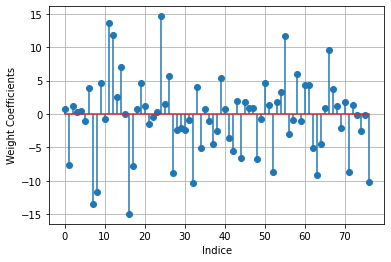

In [15]:
# TODO 14
scal = StandardScaler()
Xtr1 = scal.fit_transform(Xtr)
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(Xtr1, ytr)
W=logreg.coef_
print("the shape of W is:",W.shape)
plt.stem(W[0,:],use_line_collection=True)
plt.xlabel('Indice')
plt.ylabel('Weight Coefficients')
plt.grid()

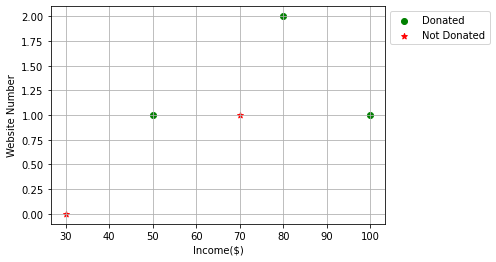

In [27]:
x1=np.array([50,80,100])
x2=np.array([1,2,1])
x11=np.array([30,70])
x22=np.array([0,1])
plt.scatter(x1,x2,color='green',marker='o',label="Donated")
plt.scatter(x11,x22,color='red',marker='*',label="Not Donated")
plt.xlabel("Income($)")
plt.ylabel("Website Number")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid()